In [36]:
inputs = {
    "3": {
        "Retiring": 27.7,
        "Front-End Latency": 9.9,
        "Front-End Bandwidth": 11.8,
        "Bad Speculation": 30.5,
        "(Back-End) Core Bound": 13.0,
        "(Back-End) Memory Bound": 7.1
    },
    "6": {
        "Retiring": 23.9,
        "Front-End Latency": 9.9,
        "Front-End Bandwidth": 11.4,
        "Bad Speculation": 35.1,
        "(Back-End) Core Bound": 11.8,
        "(Back-End) Memory Bound": 7.8
    },
    "8": {
        "Retiring": 27.7,
        "Front-End Latency": 10.1,
        "Front-End Bandwidth": 9.6,
        "Bad Speculation": 33.1,
        "(Back-End) Core Bound": 11.6,
        "(Back-End) Memory Bound": 7.9
    },
    "Map": {
        "Retiring": 26.8,
        "Front-End Latency": 9.9,
        "Front-End Bandwidth": 12.1,
        "Bad Speculation": 31.8,
        "(Back-End) Core Bound": 12.4,
        "(Back-End) Memory Bound": 6.9
    }

}

In [37]:
functions = {
    "Map": {
        "Pop_Heap_Hole": {
            "Retiring": 32.3,
            "Front-End Latency": 9.1,
            "Front-End Bandwidth": 14.7,
            "Bad Speculation": 36.8,
            "Back-End Bound": 7.0
        },
        "NearestNeighbor": {
            "Retiring": 20.4,
            "Front-End Latency": 10.2,
            "Front-End Bandwidth": 7.9,
            "Bad Speculation": 47.6, # branch mispredicts
            "Back-End Bound": 13.9
        },
        "isStateValid": {
            "Retiring": 8.6,
            "Front-End Bound": 4.5,
            "Bad Speculation": 35.4, # branch mispredicts
            "Core Bound": 5.3,
            "Memory Bound": 46.2 # mostly DRAM bound
        },
        "Distance": {
            "Retiring": 24.5,
            "Front-End Bound": 12.4,
            "Bad Speculation": 45.0, # 36% from Branch Misprediction, 9% from Machine Clears
            "Back-End Bound": 18.0
        },
        "isCostBetterThan": {
            "Retiring": 38.5,
            "Front-End Latency": 5.3,
            "Front-End Bandwidth": 17.6,
            "Bad Speculation": 35.7, # branch mispredicts
            "Back-End Bound": 2.8
        },
        "less_operation": {
            "Retiring": 25.7,
            "Front-End Latency": 10.6,  # almost entirely due to Mispredicts (Branch) Resteers
            "Front-End Bandwidth": 12.6,
            "Bad Speculation": 41.6, # branch mispredicts
            "Back-End Bound": 9.6
        }
    }
}

In [5]:
import matplotlib.pyplot as plt

In [38]:
inputs["3"]

{'Retiring': 27.7,
 'Front-End Latency': 9.9,
 'Front-End Bandwidth': 11.8,
 'Bad Speculation': 30.5,
 '(Back-End) Core Bound': 13.0,
 '(Back-End) Memory Bound': 7.1}

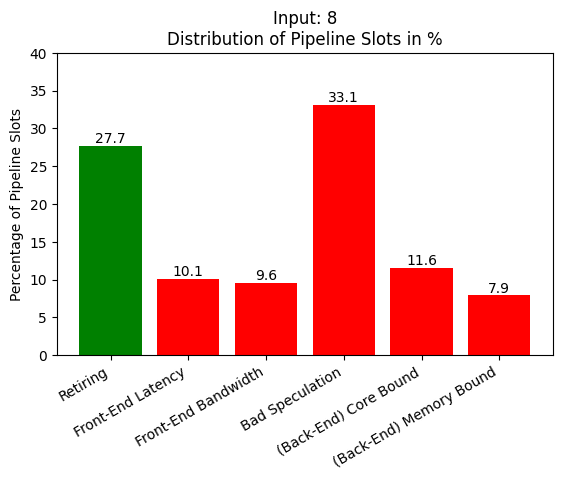

In [49]:
import numpy as np

input_image = "8"
data_points = inputs[input_image]

fig, ax = plt.subplots()

colors = ["green"] + ["red" for i in data_points.values()]
bar_container = ax.bar(data_points.keys(), data_points.values(), color=colors)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Pipeline Slots')
ax.set_title(f'Input: {input_image}\nDistribution of Pipeline Slots in %')
ax.set_ylim(0, 40)
ax.bar_label(bar_container, data_points.values())

plt.xticks(rotation=30, ha='right')
plt.subplots_adjust(bottom=0.25)
plt.savefig(f'figures/MICROARCHITECTURE_{input_image}.png')
plt.show()

In [ ]:

x = np.arange(len(inputs))  # the label locations
width = 0.33  # the width of the bars
multiplier = .5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data_points.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Milliseconds (ms)')
ax.set_title("")
ax.set_xticks(x + width, all_functions, rotation=30)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 380)

plt.show()